In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from datetime import datetime, timedelta, date, time
import pickle
from matplotlib.ticker import MaxNLocator


Import CSV file 

In [7]:
df_chicago =pd.read_csv('../dataset/chicago_2018_clean.csv') 

df_chicago


,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_per_trip,trip_time_in_hours
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,0 days 00:08:19,0.138611
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,0 days 00:20:25,0.340278
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,0 days 00:16:00,0.266667
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,0 days 00:07:14,0.120556
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,0 days 00:11:49,0.196944
...,...,...,...,...,...,...,...,...,...,...
3599456,2018-03-31 23:46:34,2018-04-01 00:05:24,158,260,Milwaukee Ave & Wabansia Ave,Kedzie Ave & Milwaukee Ave,1935,Subscriber,0 days 00:18:50,0.313889
3599457,2018-03-31 23:47:43,2018-03-31 23:52:05,299,229,Halsted St & Roscoe St,Southport Ave & Roscoe St,5852,Subscriber,0 days 00:04:22,0.072778
3599458,2018-03-31 23:50:18,2018-03-31 23:57:38,327,226,Sheffield Ave & Webster Ave,Racine Ave & Belmont Ave,4414,Subscriber,0 days 00:07:20,0.122222
3599459,2018-03-31 23:52:26,2018-04-01 00:07:13,265,426,Cottage Grove Ave & Oakwood Blvd,Ellis Ave & 60th St,6448,Subscriber,0 days 00:14:47,0.246389


In [8]:
#Convert into datetime objects
df_chicago['Time'] = pd.to_datetime(df_chicago['start_time']).dt.time
df_chicago["Hour"] = pd.to_datetime(df_chicago["start_time"]).dt.hour
df_chicago["Month"]= pd.to_datetime(df_chicago["start_time"]).dt.month
df_chicago["Weekday"]= pd.to_datetime(df_chicago["start_time"]).dt.dayofweek
df_chicago['Day'] = pd.to_datetime(df_chicago['start_time']).dt.date
df_chicago["Day"]= pd.to_datetime(df_chicago["Day"])


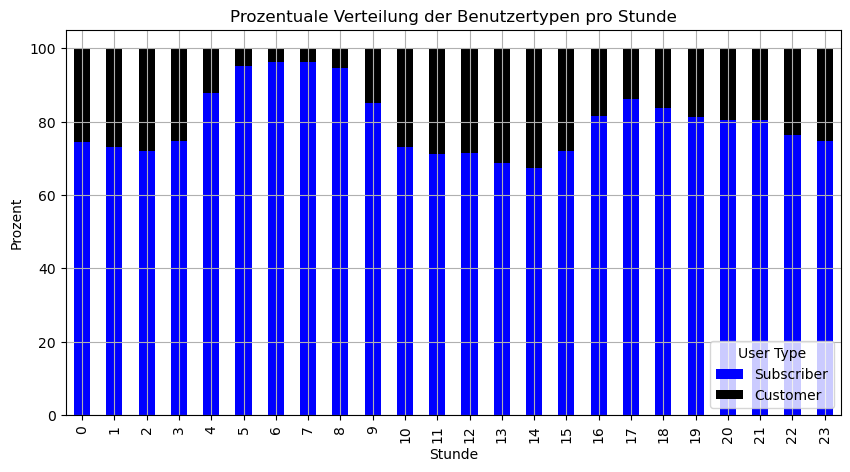

In [9]:
# Spalte für die Stunde der Fahrt erstellen
df_chicago['hour'] = pd.to_datetime(df_chicago['start_time']).dt.hour

# Anzahl der Fahrten pro Stunde und pro Benutzertyp zählen
counts = df_chicago.groupby(['hour', 'user_type']).size().reset_index(name='counts')

# Tabelle mit Anzahl der Fahrten pro Stunde und pro Benutzertyp erstellen
counts_table = counts.pivot(index='hour', columns='user_type', values='counts')

# Prozentuale Verteilung der Benutzertypen pro Stunde berechnen
counts_table['Total'] = counts_table.sum(axis=1)
counts_table['Subscriber_percent'] = counts_table['Subscriber'] / counts_table['Total'] * 100
counts_table['Customer_percent'] = counts_table['Customer'] / counts_table['Total'] * 100

# Neu ordnen der Indizes
counts_table = counts_table.reindex(range(0,24))

# Balkendiagramm erstellen
counts_table[['Subscriber_percent', 'Customer_percent']].plot(kind='bar', stacked=True, title='Prozentuale Verteilung der Benutzertypen pro Stunde', grid=True, figsize=(10,5), color=['blue','black'])
plt.xlabel('Stunde')
plt.ylabel('Prozent')
plt.legend(['Subscriber','Customer'],title="User Type",loc='lower right')
plt.show()


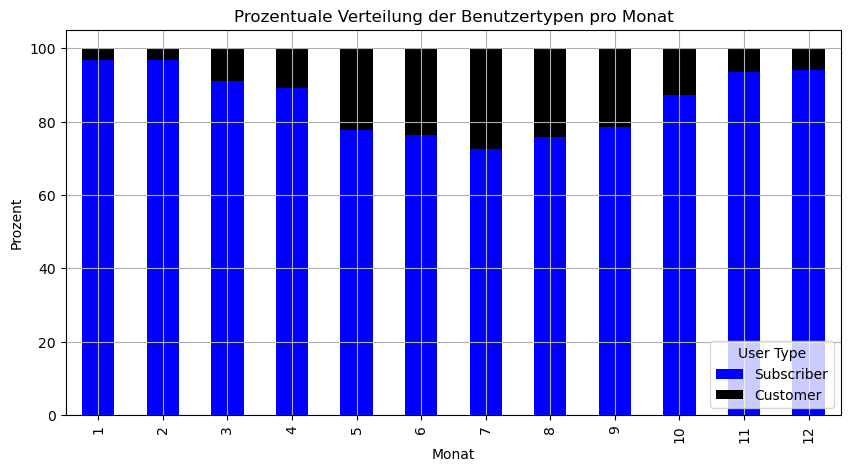

In [10]:
# Spalte für den Monat der Fahrt erstellen
df_chicago['start_time'] = pd.to_datetime(df_chicago['start_time'])
df_chicago['month'] = df_chicago['start_time'].dt.month

# Anzahl der Fahrten pro Monat und pro Benutzertyp zählen
counts = df_chicago.groupby(['month', 'user_type']).size().reset_index(name='counts')

# Tabelle mit Anzahl der Fahrten pro Monat und pro Benutzertyp erstellen
counts_table = counts.pivot(index='month', columns='user_type', values='counts')

# Prozentuale Verteilung der Benutzertypen pro Monat berechnen
counts_table['Total'] = counts_table.sum(axis=1)
counts_table['Subscriber_percent'] = counts_table['Subscriber'] / counts_table['Total'] * 100
counts_table['Customer_percent'] = counts_table['Customer'] / counts_table['Total'] * 100

# Balkendiagramm erstellen
counts_table[['Subscriber_percent', 'Customer_percent']].plot(kind='bar', stacked=True, title='Prozentuale Verteilung der Benutzertypen pro Monat', grid=True, figsize=(10,5), color=['blue','black'])
plt.xlabel('Monat')
plt.ylabel('Prozent')
plt.legend(['Subscriber','Customer'],title="User Type",loc='lower right')
plt.show()

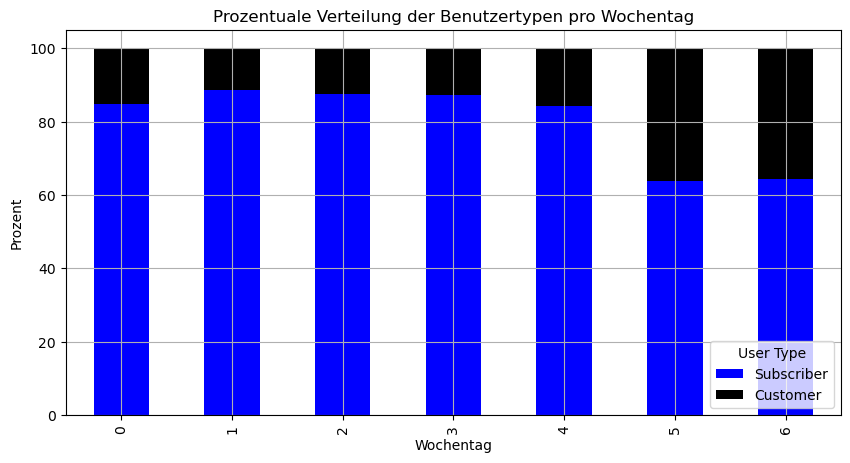

In [11]:
# Spalte für den Wochentag der Fahrt erstellen
df_chicago['start_time'] = pd.to_datetime(df_chicago['start_time'])

# Anzahl der Fahrten pro Wochentag und pro Benutzertyp zählen
counts = df_chicago.groupby(['Weekday', 'user_type']).size().reset_index(name='counts')

# Tabelle mit Anzahl der Fahrten pro Wochentag und pro Benutzertyp erstellen
counts_table = counts.pivot(index='Weekday', columns='user_type', values='counts')

# Prozentuale Verteilung der Benutzertypen pro Wochentag berechnen
counts_table['Total'] = counts_table.sum(axis=1)
counts_table['Subscriber_percent'] = counts_table['Subscriber'] / counts_table['Total'] * 100
counts_table['Customer_percent'] = counts_table['Customer'] / counts_table['Total'] * 100

# Balkendiagramm erstellen
counts_table[['Subscriber_percent', 'Customer_percent']].plot(kind='bar', stacked=True, title='Prozentuale Verteilung der Benutzertypen pro Wochentag', grid=True, figsize=(10,5), color=['blue','black'])
plt.xlabel('Wochentag')
plt.ylabel('Prozent')
plt.legend(['Subscriber','Customer'],title="User Type",loc='lower right')
plt.show()